## Challenge (Modelling)

In [1]:
# Libraries for path management and data analysis
import os
import pandas as pd

In [2]:
# Going to the root of the project
os.chdir('..')

In [3]:
data = pd.read_csv('data/application_info.csv')

/tmp/ipykernel_23874/851070366.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/application_info.csv')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 98 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 307511 non-null  int64  
 1   id                         307511 non-null  int64  
 2   default                    307511 non-null  int64  
 3   contract_type              307511 non-null  object 
 4   gender                     307511 non-null  object 
 5   flag_vehicle               307511 non-null  object 
 6   flag_properties            307511 non-null  object 
 7   num_children               307511 non-null  int64  
 8   total_income               307511 non-null  object 
 9   loan_amount                307511 non-null  object 
 10  anual_payment              307499 non-null  object 
 11  product_amount             307233 non-null  object 
 12  accompained                306219 non-null  object 
 13  income_type                30

In [5]:
features = list(data.columns)
features

['Unnamed: 0',
 'id',
 'default',
 'contract_type',
 'gender',
 'flag_vehicle',
 'flag_properties',
 'num_children',
 'total_income',
 'loan_amount',
 'anual_payment',
 'product_amount',
 'accompained',
 'income_type',
 'education',
 'marital_status',
 'residence_type',
 'normalised_pop',
 'age',
 'work_age',
 'registry_age',
 'id_age',
 'vehicle_age',
 'flag_cellphone',
 'flag_work_phone',
 'flag_work_company',
 'flag_cellphone_answer',
 'flag_homephone',
 'flag_email',
 'occupation',
 'family_num',
 'region_score',
 'region_city_score',
 'dayofweek_application',
 'hour_application',
 'flag_direperm_direcon_reg',
 'flag_direperm_diretra_reg',
 'flag_direcon_diretra_reg',
 'flag_direperm_direcon_ciu',
 'flag_direperm_diretra_ciu',
 'flag_direcon_diretra_ciu',
 'type_organisation',
 'external_score_1',
 'external_score_2',
 'external_score_3',
 'num_apart_average',
 'area_basement_average',
 'age_expl_average',
 'age_building_average',
 'area_common_average',
 'num_lifts_average',
 'num

In [6]:
data = data.drop(['Unnamed: 0','id','education','residence_type'], axis=1)

In [7]:
data.head(5)

,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,anual_payment,product_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
0,1,personal loan,M,N,Y,0,202500,"406597,5","24700,5",351000,...,"0,0149",brick,N,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,personal loan,F,N,N,0,270000,"1293502,5","35698,5",1129500,...,"0,0714",concrete,N,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,credit card,M,Y,Y,0,67500,135000,6750,135000,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,personal loan,F,N,Y,0,135000,"312682,5","29686,5",297000,...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,personal loan,M,N,Y,0,121500,513000,"21865,5",513000,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
r_list = ['total_income', 'loan_amount', 'anual_payment', 'product_amount', 'normalised_pop', 'registry_age', 'external_score_1', 'external_score_2', 'external_score_3', 'num_apart_average',
          'area_basement_average', 'age_expl_average', 'age_building_average', 'area_common_average', 'num_lifts_average', 'num_entries_average', 'max_floor_average', 'min_floor_average',
          'area_building_average', 'num_apart_habit_average', 'area_habit_average', 'num_apart_nohabit_average', 'area_nohabit_average', 'num_apart_mode', 'area_basement_mode', 'age_expl_mode', 
          'age_building_mode', 'area_common_mode', 'num_lifts_mode', 'num_entries_mode', 'max_floor_mode', 'min_floor_mode', 'area_building_mode', 'num_apart_habit_mode', 'area_habit_mode', 
          'num_apart_nohabit_mode', 'area_nohabit_mode', 'num_apart_median', 'area_basement_median', 'age_expl_median', 'age_building_median', 'area_common_median', 'num_lifts_median', 
          'num_entries_median', 'max_floor_median', 'min_floor_median', 'area_building_median', 'num_apart_habit_median', 'area_habit_median', 'num_apart_nohabit_median', 'area_nohabit_median', 
          'total_area', 'age_mobilephone_days', 'num_petic_bureau_hour', 'num_petic_bureau_day', 'num_petic_bureau_week', 'num_petic_bureau_month', 'num_petic_bureau_quarter', 
          'num_petic_bureau_year']

In [9]:
# Reformating object to numerical values
data[r_list] = data[r_list].replace({',':'.'}, regex=True)
data[r_list] = data[r_list].apply(pd.to_numeric)

In [10]:
data.head(5)

,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,anual_payment,product_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
0,1,personal loan,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0149,brick,N,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,personal loan,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0714,concrete,N,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,credit card,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,personal loan,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,personal loan,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Transforming categorical to numerical
column_equivalence = {}
features = list(data.columns)
for i, column in enumerate(list([str(d) for d in data.dtypes])):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        categorical_column = data[data.columns[i]].astype("category")
        column_equivalence[i] = dict(enumerate(categorical_column.cat.categories))
        data[data.columns[i]] = categorical_column.cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mean())

In [12]:
len(column_equivalence)

13

In [13]:
ce = {}
for i in column_equivalence:
    ce[i] = {y:x for (x,y) in column_equivalence[i].items()}
ce

{1: {'credit card': 0, 'personal loan': 1},
 2: {'F': 0, 'M': 1, 'not specified': 2},
 3: {'N': 0, 'Y': 1},
 4: {'N': 0, 'Y': 1},
 10: {'alone': 0,
  'children': 1,
  'couple': 2,
  'family': 3,
  'group': 4,
  'other_1': 5,
  'other_2': 6},
 11: {'public servant': 0,
  'retirement': 1,
  'salary': 2,
  'self-employment': 3,
  'shareholder': 4,
  'sick leave': 5,
  'student': 6,
  'unemployment': 7},
 12: {'civil partnership': 0,
  'divorced': 1,
  'married': 2,
  'single': 3,
  'unspecified': 4,
  'widowed': 5},
 25: {'HR': 0,
  'IT': 1,
  'accounting': 2,
  'cleaning': 3,
  'commercial': 4,
  'cooking': 5,
  'drivers': 6,
  'external': 7,
  'health': 8,
  'internal': 9,
  'managers': 10,
  'private sector': 11,
  'professional': 12,
  'real estate agent': 13,
  'secretary': 14,
  'security': 15,
  'technical': 16,
  'waiter': 17},
 29: {'Fri': 0, 'Mon': 1, 'Sat': 2, 'Sun': 3, 'Thu': 4, 'Tue': 5, 'Wed': 6},
 37: {'agriculture': 0,
  'bank': 1,
  'business type 1': 2,
  'business type 

In [14]:
data.head(5)

,default,contract_type,gender,flag_vehicle,flag_properties,num_children,total_income,loan_amount,anual_payment,product_amount,...,total_area,wall_materials,emergency_exits,age_mobilephone_days,num_petic_bureau_hour,num_petic_bureau_day,num_petic_bureau_week,num_petic_bureau_month,num_petic_bureau_quarter,num_petic_bureau_year
0,1,1,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.014900,0,0,-1134.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,0,1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.071400,1,0,-828.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,0,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.102547,-1,-1,-815.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,0,1,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.102547,-1,-1,-617.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,0,1,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.102547,-1,-1,-1106.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


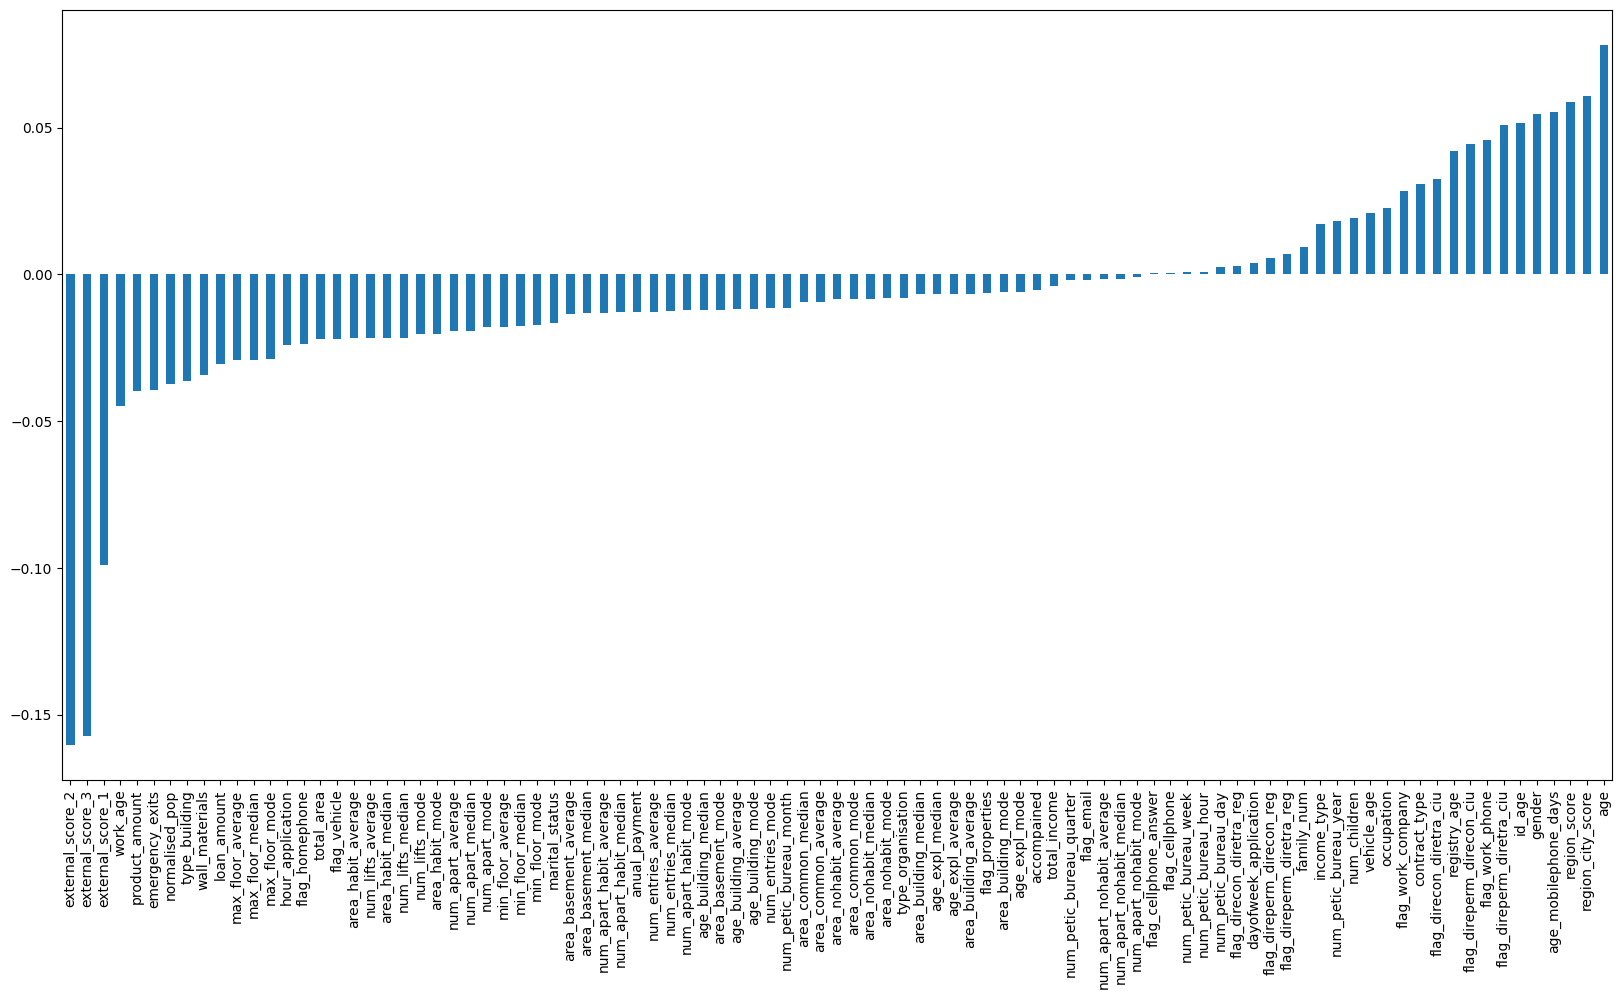

In [15]:
# Studying correlations with respect to the target varible (Default).
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
data.corr()['default'].sort_values(ascending=True)[:-1].plot(kind='bar')
plt.show()

In [16]:
corr = data.corr()['default'] 
#filt = corr[(corr<=-0.02) & (corr>=0.02)]
dis = list(corr[(corr>-0.035) & (corr<0.035)].index)
len(dis)

71

In [17]:
# Discarting features based on its correlation with target variable
cdata = data.drop(dis, axis=1)
cdata.head(5)

,default,contract_type,gender,loan_amount,product_amount,normalised_pop,age,work_age,registry_age,id_age,...,flag_direperm_direcon_ciu,flag_direperm_diretra_ciu,flag_direcon_diretra_ciu,external_score_1,external_score_2,external_score_3,type_building,wall_materials,emergency_exits,age_mobilephone_days
0,1,1,1,406597.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0.083037,0.262949,0.139376,0,0,0,-1134.0
1,0,1,0,1293502.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0.311267,0.622246,0.510853,0,1,0,-828.0
2,0,0,1,135000.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0.502130,0.555912,0.729567,-1,-1,-1,-815.0
3,0,1,0,312682.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0.502130,0.650442,0.510853,-1,-1,-1,-617.0
4,0,1,1,513000.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,1,1,0.502130,0.322738,0.510853,-1,-1,-1,-1106.0


In [18]:
features = list(cdata.columns)[1:]
features

['contract_type',
 'gender',
 'loan_amount',
 'product_amount',
 'normalised_pop',
 'age',
 'work_age',
 'registry_age',
 'id_age',
 'flag_work_phone',
 'region_score',
 'region_city_score',
 'flag_direperm_direcon_ciu',
 'flag_direperm_diretra_ciu',
 'flag_direcon_diretra_ciu',
 'external_score_1',
 'external_score_2',
 'external_score_3',
 'type_building',
 'wall_materials',
 'emergency_exits',
 'age_mobilephone_days']

In [19]:
# Rescaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(cdata)
sdata = pd.DataFrame(scaled)
sdata.columns = cdata.columns
sdata.head(5)

,default,contract_type,gender,loan_amount,product_amount,normalised_pop,age,work_age,registry_age,id_age,...,flag_direperm_direcon_ciu,flag_direperm_diretra_ciu,flag_direcon_diretra_ciu,external_score_1,external_score_2,external_score_3,type_building,wall_materials,emergency_exits,age_mobilephone_days
0,1.0,1.0,0.5,0.090287,0.077441,0.256321,0.888839,0.045086,0.852140,0.705433,...,0.0,0.0,0.0,0.072215,0.307542,0.155054,0.333333,0.142857,0.5,0.735788
1,0.0,1.0,0.0,0.311736,0.271605,0.045016,0.477114,0.043648,0.951929,0.959566,...,0.0,0.0,0.0,0.312933,0.727773,0.569889,0.333333,0.285714,0.5,0.807083
2,0.0,0.0,0.5,0.022472,0.023569,0.134897,0.348534,0.046161,0.827335,0.648326,...,0.0,0.0,0.0,0.514238,0.650190,0.814130,0.000000,0.000000,0.0,0.810112
3,0.0,1.0,0.0,0.066837,0.063973,0.107023,0.350846,0.038817,0.601451,0.661387,...,0.0,0.0,0.0,0.514238,0.760751,0.569889,0.000000,0.000000,0.0,0.856244
4,0.0,1.0,0.5,0.116854,0.117845,0.392880,0.298591,0.038820,0.825268,0.519522,...,0.0,1.0,1.0,0.514238,0.377472,0.569889,0.000000,0.000000,0.0,0.742311


In [20]:
#sdata.to_csv('data/sdata.csv')

In [21]:
#sdata = pd.read_csv('data/sdata.csv')
#sdata = sdata.drop(sdata.columns[0], axis=1)

### Modeling and training

In [22]:
# Libraries for importing the data and creating the Logistic Regression model
from sklearn.model_selection import train_test_split

In [23]:
#  Generating the data to separate the response variable from the original data
X = sdata.drop(sdata.columns[0], axis=1)
y = sdata.pop(sdata.columns[0])

In [24]:
# Balancing the data to try improving the performance
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(random_state=42)
X_res, y_res = over_sampler.fit_resample(X, y)


In [25]:
# Separating data into training and test data
X_train, X_test, y_train, y_test = train_test_split( X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.fit(X_res)

In [27]:
# X_rtrain = pca.transform(X_res)
# X_rtest = pca.transform(X_test)

#### Metrics 

In [30]:
# Measuring the results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

0.6637561021625829

#### DecisionTree

In [33]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

In [34]:
tree_model.fit(X_train, y_res)

DecisionTreeClassifier()

In [35]:
y_tree = tree_model.predict(X_test)

In [36]:
accuracy_score(y_test, y_tree)


1.0


In [37]:
confusion_matrix(y_test, y_tree)

array([[84845,     0],
       [    0, 84767]])

### Testing other algoritms

#### Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=2, random_state=0)

In [39]:
rf_model.fit(X_res, y_res)

RandomForestClassifier(max_depth=2, random_state=0)

In [40]:
y_rf =rf_model.predict(X_test)

In [41]:
score = accuracy_score(y_test, y_rf)
print(score)

0.6868558828384784


In [42]:
confusion_matrix(y_test,y_rf)

array([[55270, 29575],
       [23538, 61229]])

### XGBoost

In [43]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

In [44]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
y_xgb = xgb_model.predict(X_test)

In [46]:
score = accuracy_score(y_test, y_xgb)
print(score)

0.925535929061623


In [47]:
confusion_matrix(y_test,y_xgb)

array([[81735,  3110],
       [ 9520, 75247]])

In [48]:
f1_score(y_test, y_xgb)

0.9225742380029917

#### ExtraTrees

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
et_model = ExtraTreesClassifier()

In [50]:
et_model.fit(X_train, y_train)

ExtraTreesClassifier()

In [51]:
y_et = et_model.predict(X_test)

In [52]:
score = accuracy_score(y_test, y_et)
print(score)

0.9443671438341626


In [53]:
confusion_matrix(y_test,y_et)

array([[78547,  6298],
       [ 3138, 81629]])

In [54]:
f1_score(y_test, y_et)

0.9453600009264943

In [55]:
# Saving binaries for the reusing of the model, the equivalence of categorical variables, and the model features 

import pickle
pickle.dump(et_model, open("models/model.pk", "wb"))
pickle.dump(ce, open("models/column_equivalence.pk", "wb"))
pickle.dump(features, open("models/features.pk", "wb"))

: 

: 